# Importing the needed libraries for the project

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
import joblib

This is dataset which is used to recommend the crop for the suitable soil. This will be very useful in crop production (Agriculture) without looses based on soli ph, rainfall, humadity and other chemical components present in the soil.

In [12]:
df = pd.read_csv("Crop_recommendation.csv")

# About the data 
- Nitrogen: A vital component of chlorophyll which is the green colouring matter in plants.
- Phosphorus: promotes root growth, cell division and development of new plant tissues.
- Potassium: Critical nutrient absorbed in soil to increase disease resistance and help stalks grow upright
- Soil temperatures: Aid in bioactivity ranging from 50-70F
- PH: Ranges  from 5.5 to 6.5 for plant growth and nutrition
- Rainfall: Helps in determining how fast a seed will develop
- Label: Target variable of the plant thriving in a set condition

In [13]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
df.rename(columns = {"N":"nitrogen","P":"phosphorus","K":"potassium","ph":"PH"}, inplace = True)

In [15]:
df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [16]:
# Checking on the dataframes shape
df.shape

(2200, 8)

In [17]:
# Checking for null values
df.isnull().sum()

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
PH             0
rainfall       0
label          0
dtype: int64

In [18]:
# Checking for the data types
df.dtypes

nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
PH             float64
rainfall       float64
label           object
dtype: object

In [19]:
#  Checking on the statistical summary
df.describe()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# EDA Analysis
- Data distribution

<Figure size 800x600 with 0 Axes>

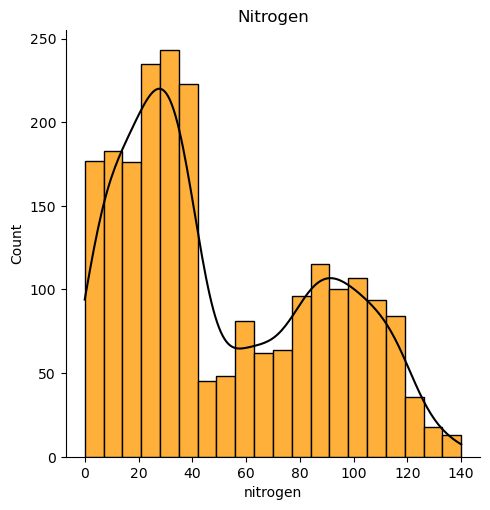

In [25]:
plt.figure(figsize=(8,6))
sns.displot(x=df["nitrogen"], bins=20,kde=True,edgecolor="black",color="black",facecolor="#ffb03b")
plt.title("Nitrogen")
plt.show()

<Figure size 800x600 with 0 Axes>

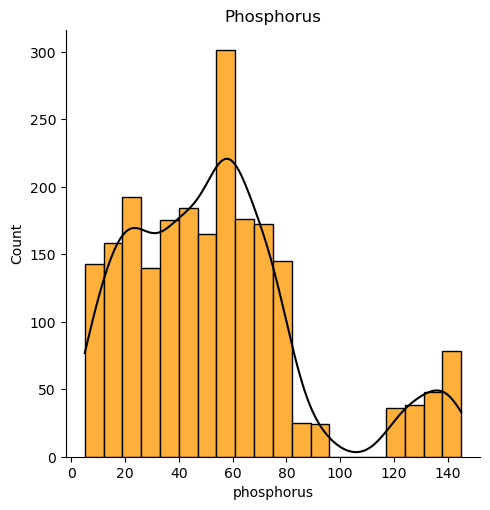

In [27]:
plt.figure(figsize=(8,6))
sns.displot(x=df["phosphorus"],bins=20,color="black",edgecolor="black",kde=True,facecolor="#ffb03b")
plt.title("Phosphorus")
plt.show()

<Figure size 800x600 with 0 Axes>

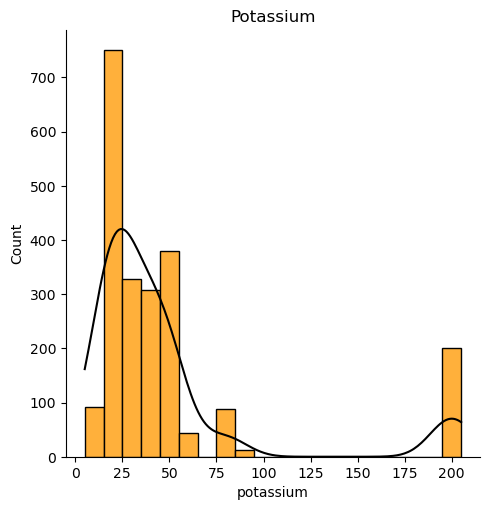

In [29]:
plt.figure(figsize=(8,6))
sns.displot(x=df["potassium"],bins=20,color="black",edgecolor="black",kde=True,facecolor="#ffb03b")
plt.title("Potassium")
plt.show()

<Figure size 800x600 with 0 Axes>

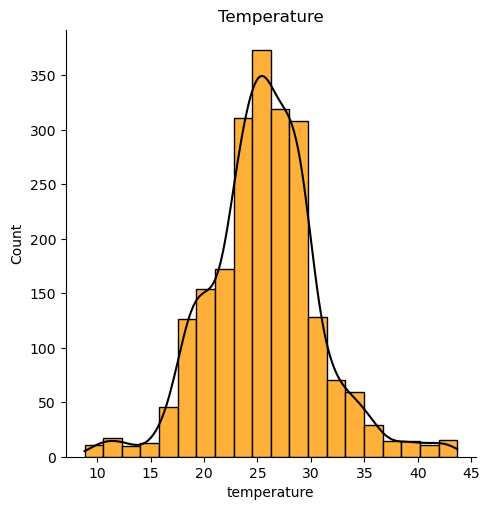

In [32]:
plt.figure(figsize=(8,6))
sns.displot(x=df["temperature"],bins=20,color="black",edgecolor="black",kde=True,facecolor="#ffb03b")
plt.title("Temperature")
plt.show()

<Figure size 800x600 with 0 Axes>

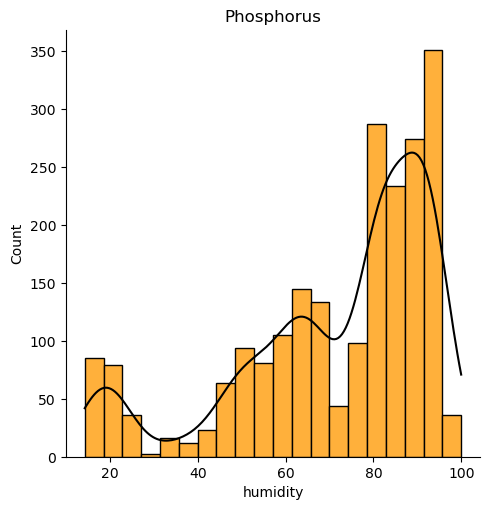

In [33]:
plt.figure(figsize=(8,6))
sns.displot(x=df["humidity"],bins=20,color="black",edgecolor="black",kde=True,facecolor="#ffb03b")
plt.title("Phosphorus")
plt.show()

<Figure size 800x600 with 0 Axes>

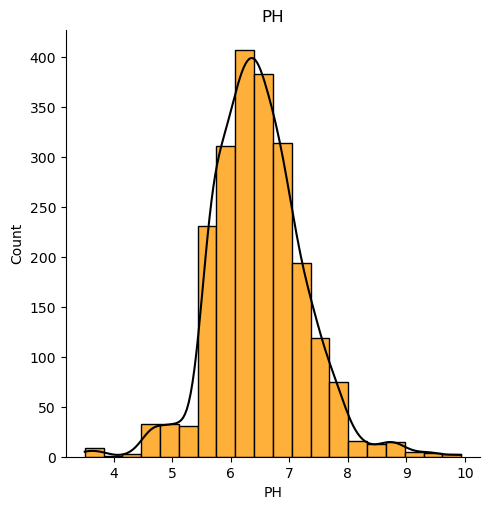

In [35]:
plt.figure(figsize=(8,6))
sns.displot(x=df["PH"],bins=20,color="black",edgecolor="black",kde=True,facecolor="#ffb03b")
plt.title("PH")
plt.show()

<Figure size 800x600 with 0 Axes>

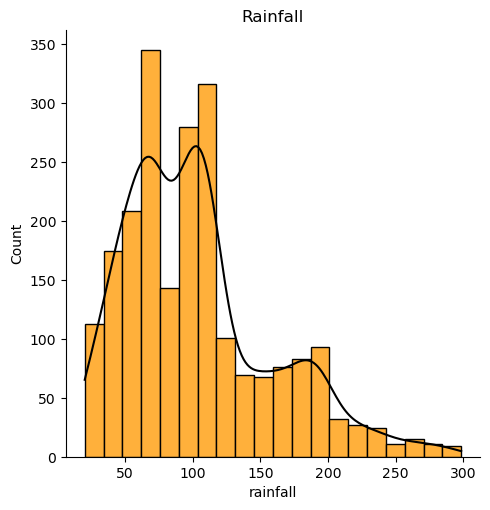

In [36]:
plt.figure(figsize=(8,6))
sns.displot(x=df["rainfall"],bins=20,color="black",edgecolor="black",kde=True,facecolor="#ffb03b")
plt.title("Rainfall")
plt.show()

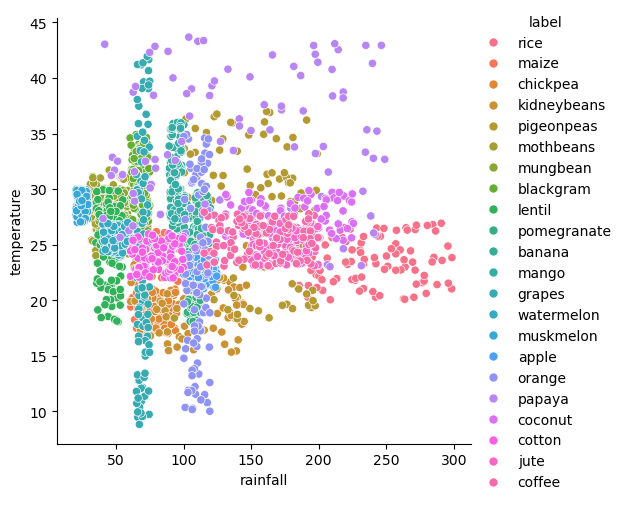

In [38]:
# Viewing the relationship between rainfall and temperatures in regards to the crop that fluorishes in the set conditons
sns.relplot(data=df,x="rainfall",y="temperature",kind="scatter",hue="label",height=5)
plt.show()

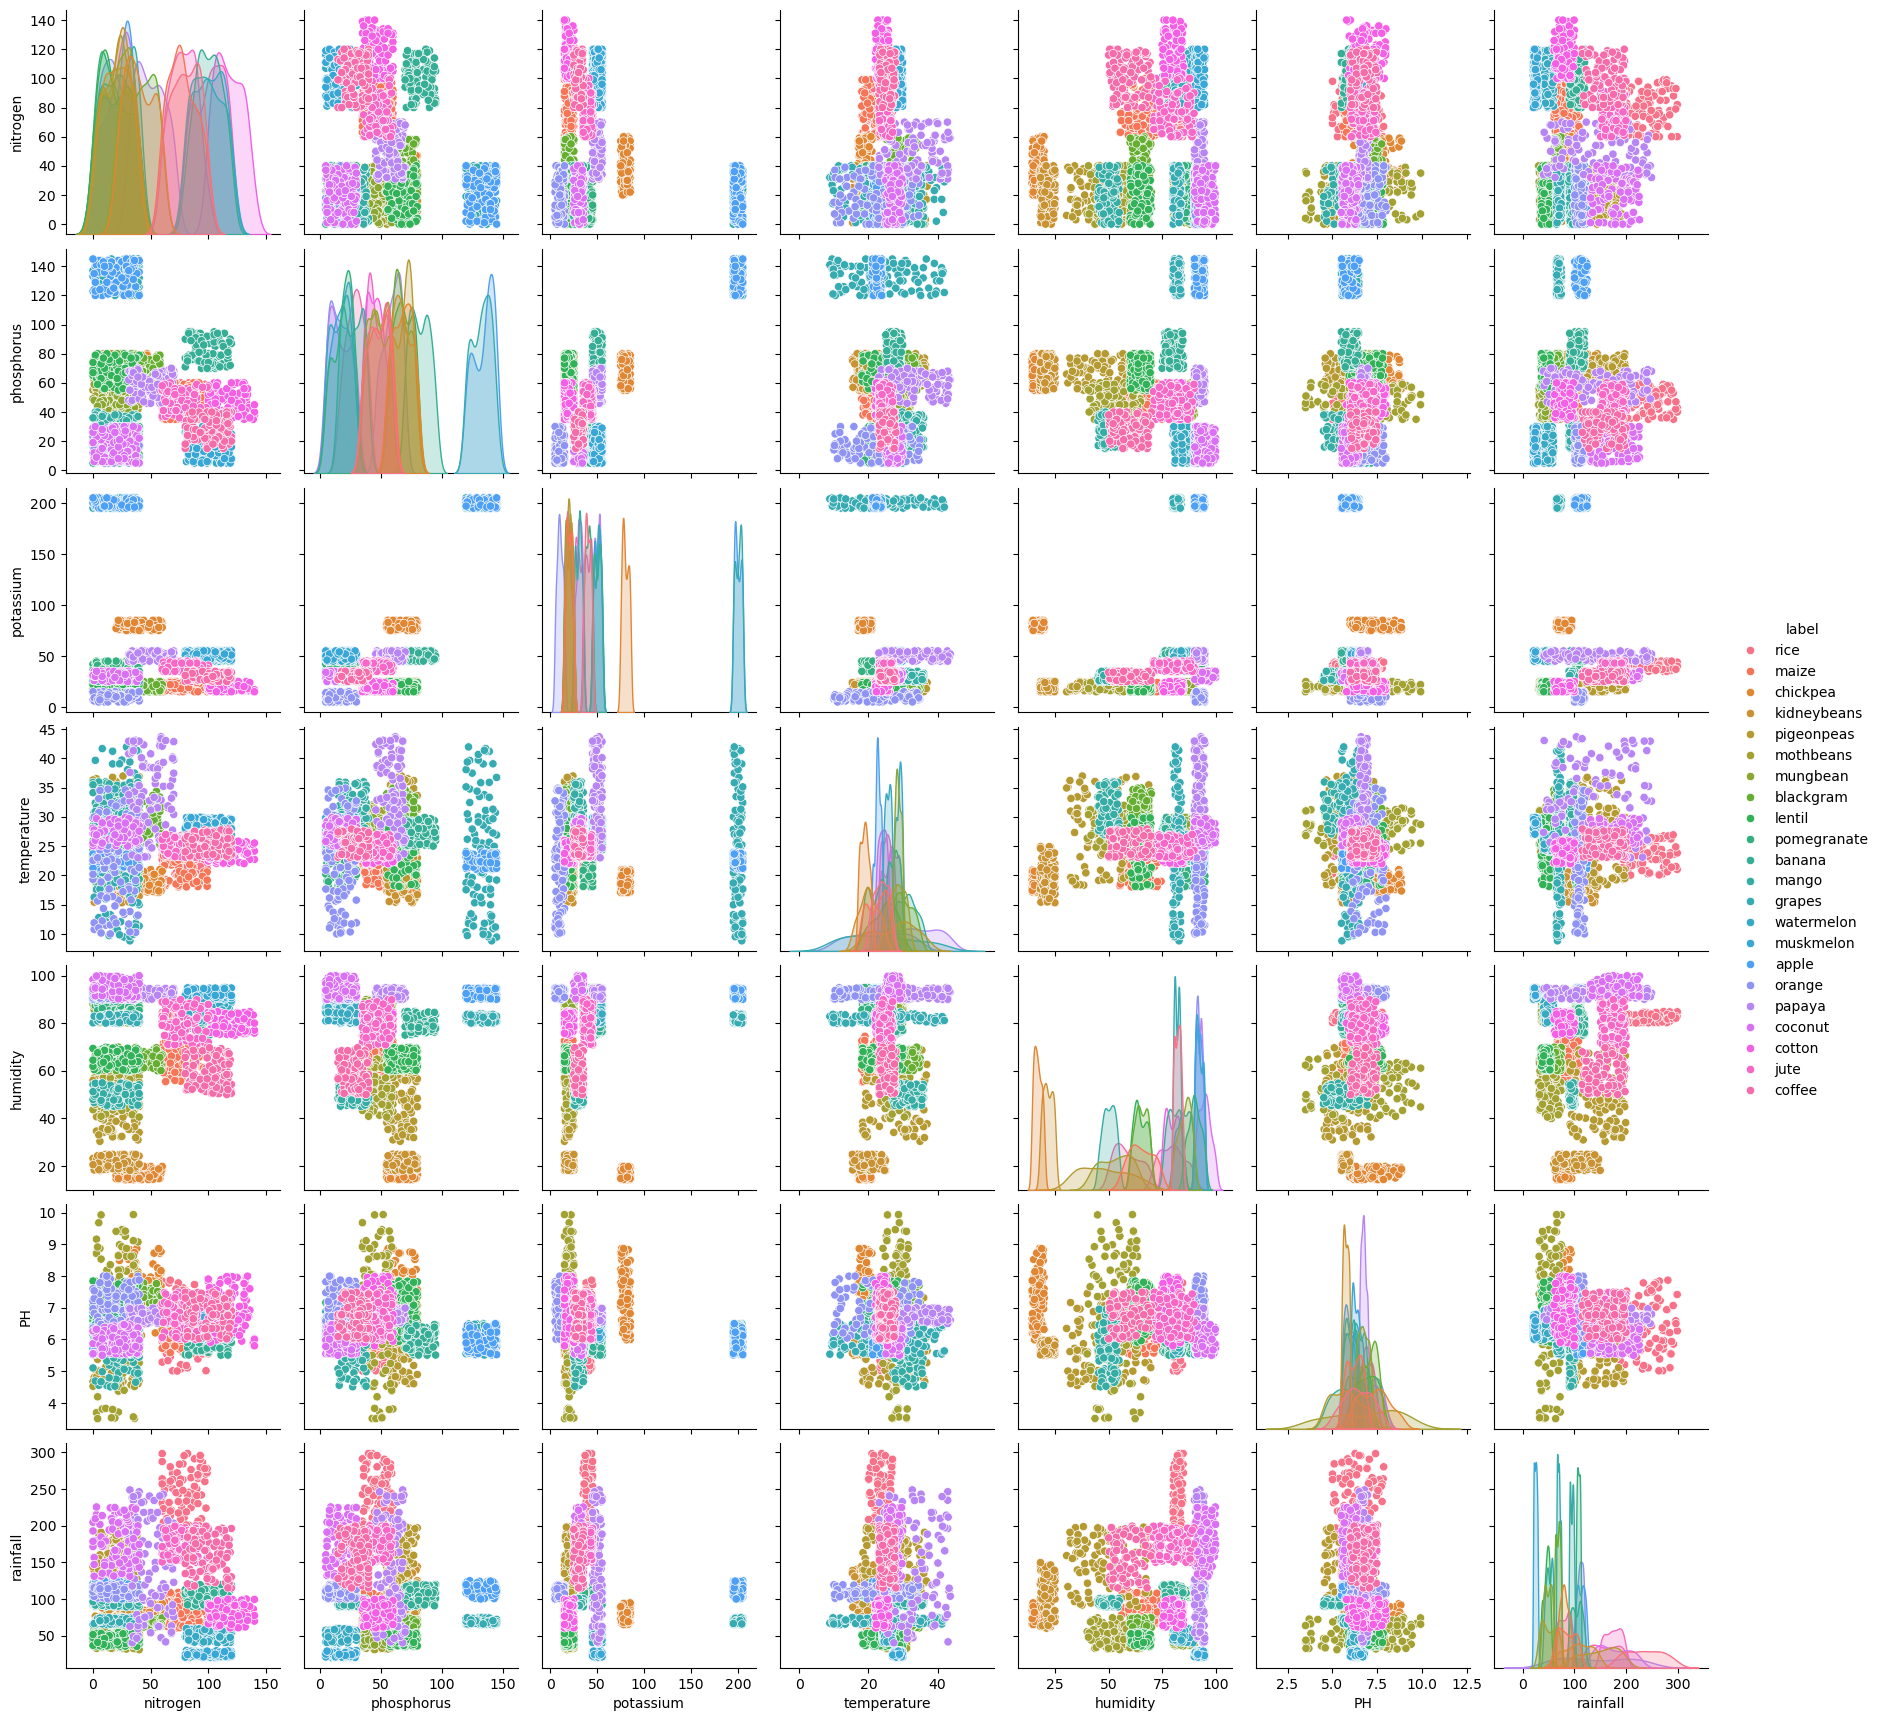

In [39]:
sns.pairplot(data=df,hue="label")
plt.show()

In [43]:
# Outlier detection
crops = df["label"].unique()
print(len(crops))
print(crops)
print(df["label"].value_counts())

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [48]:
# Filtering each unique label and storing it in a new list (df2) to plot boxplots
df2 = []   
for i in crops:
    df2.append(df[df["label"] == i])
df2[0].head()   

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


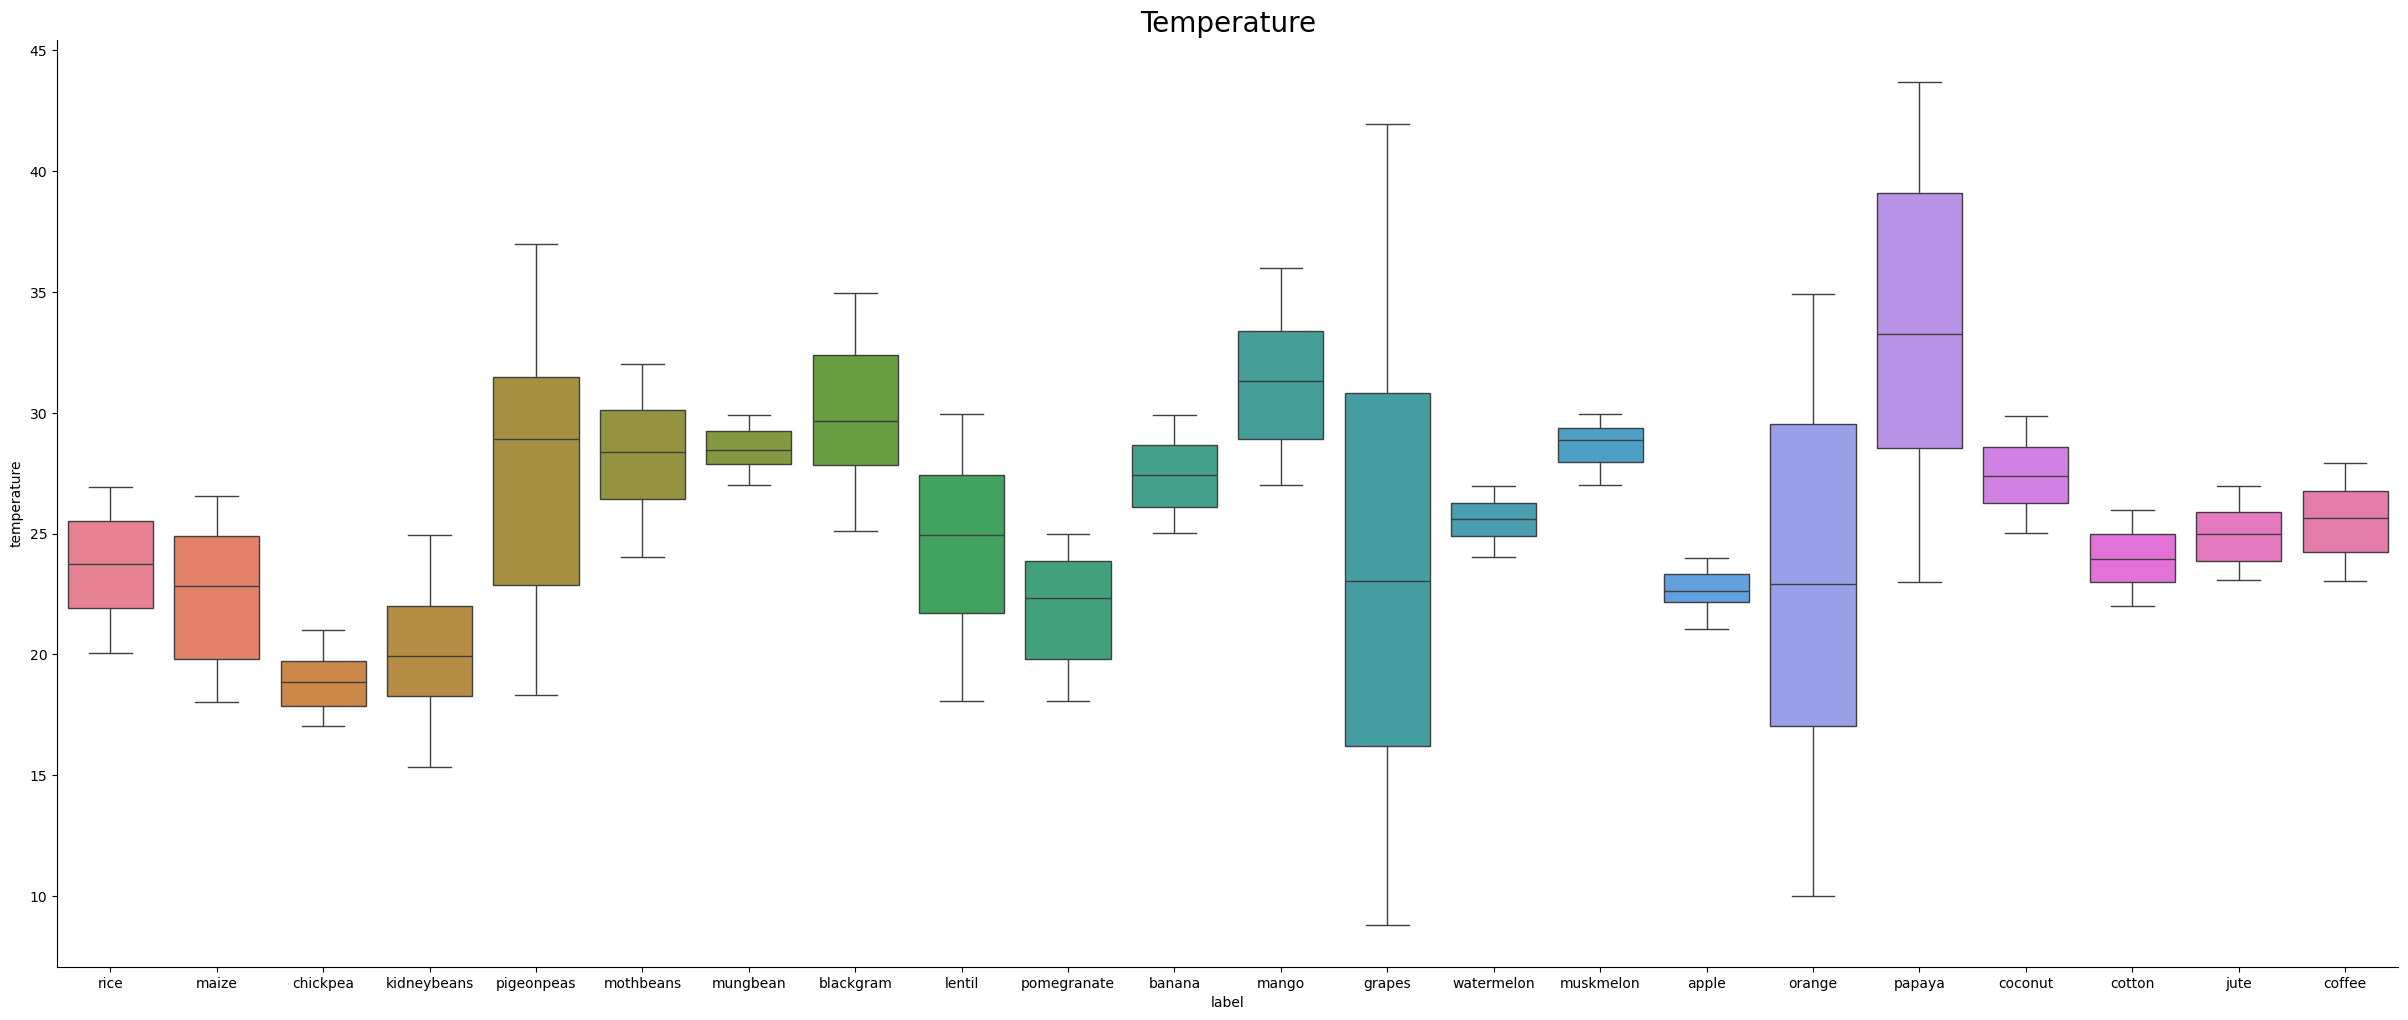

In [53]:
# Checking different crop variations in regards to temperature
sns.catplot(data=df, x="label", y="temperature", kind="box",hue="label", height=10, aspect=20/8.27)
plt.title("Temperature", size=20)
plt.show()

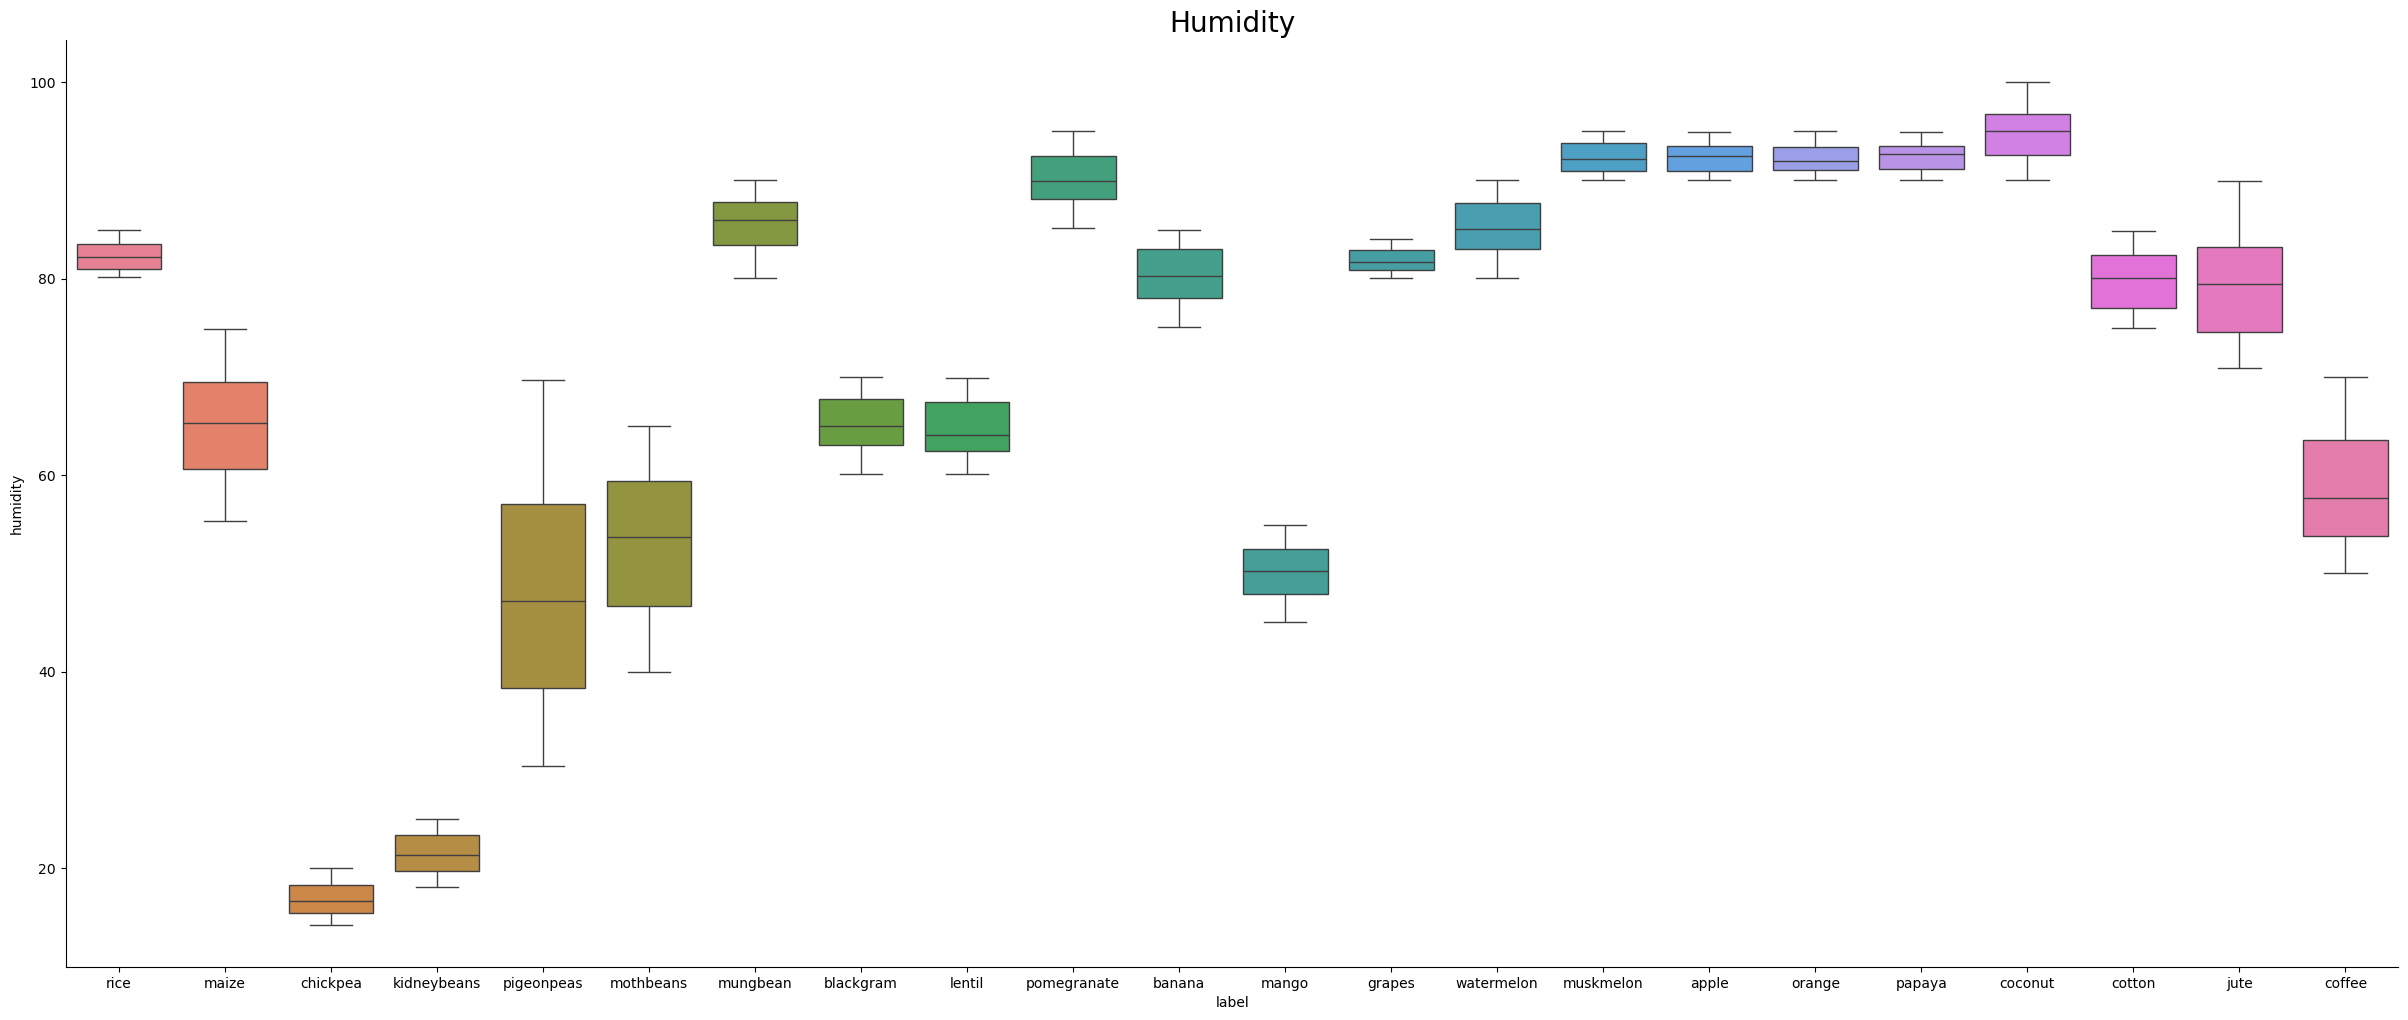

In [54]:
sns.catplot(data=df, x="label", y="humidity", kind="box",hue="label", height=10, aspect=20/8.27)
plt.title("Humidity", size=20)
plt.show()

Text(0.5, 1.0, 'Temperature')

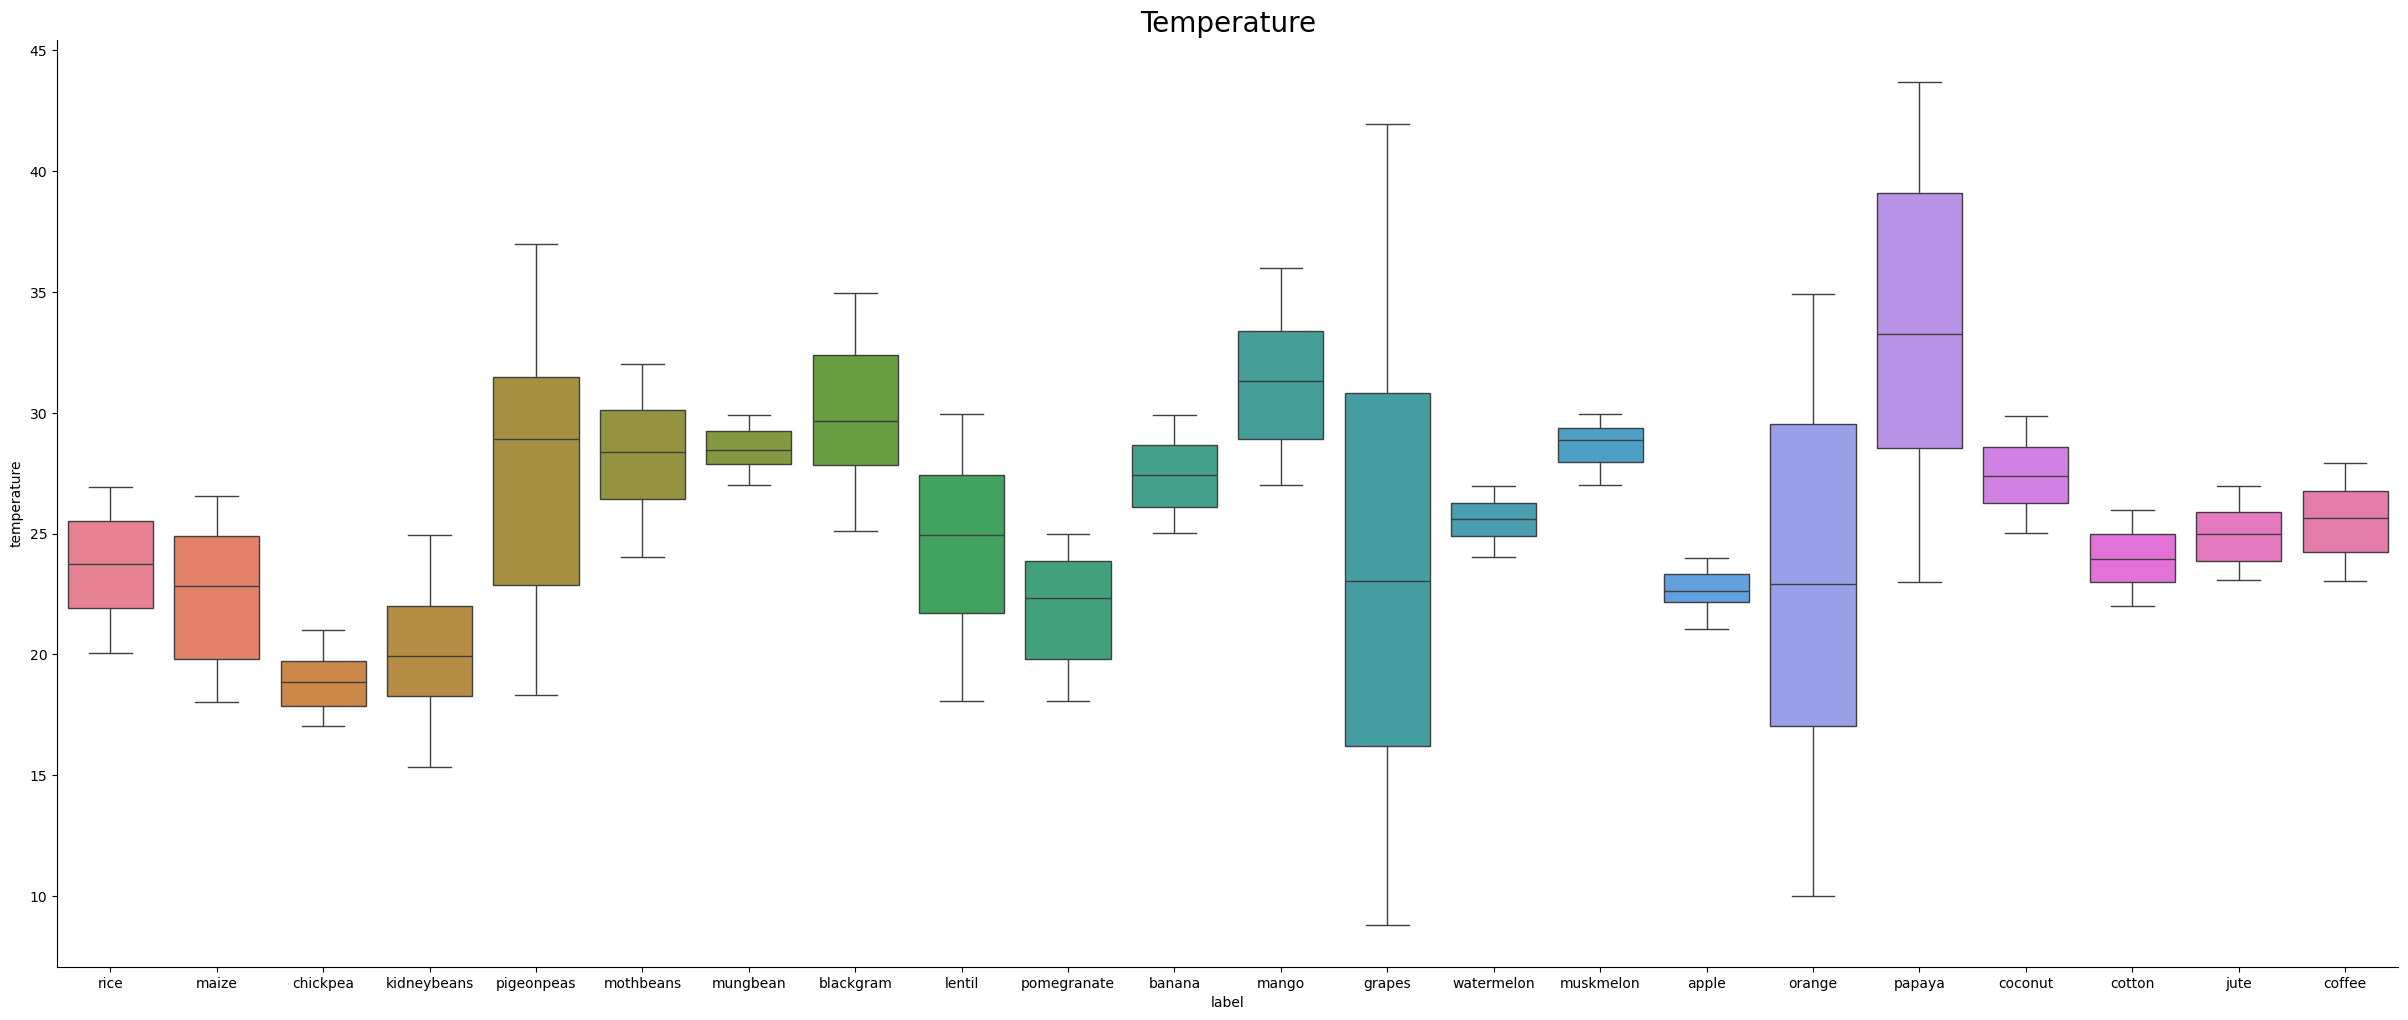

In [55]:
sns.catplot(data=df,x="label",y="temperature",kind="box",hue="label",height=10,aspect=20/8.27)
plt.title("Temperature",size=20)

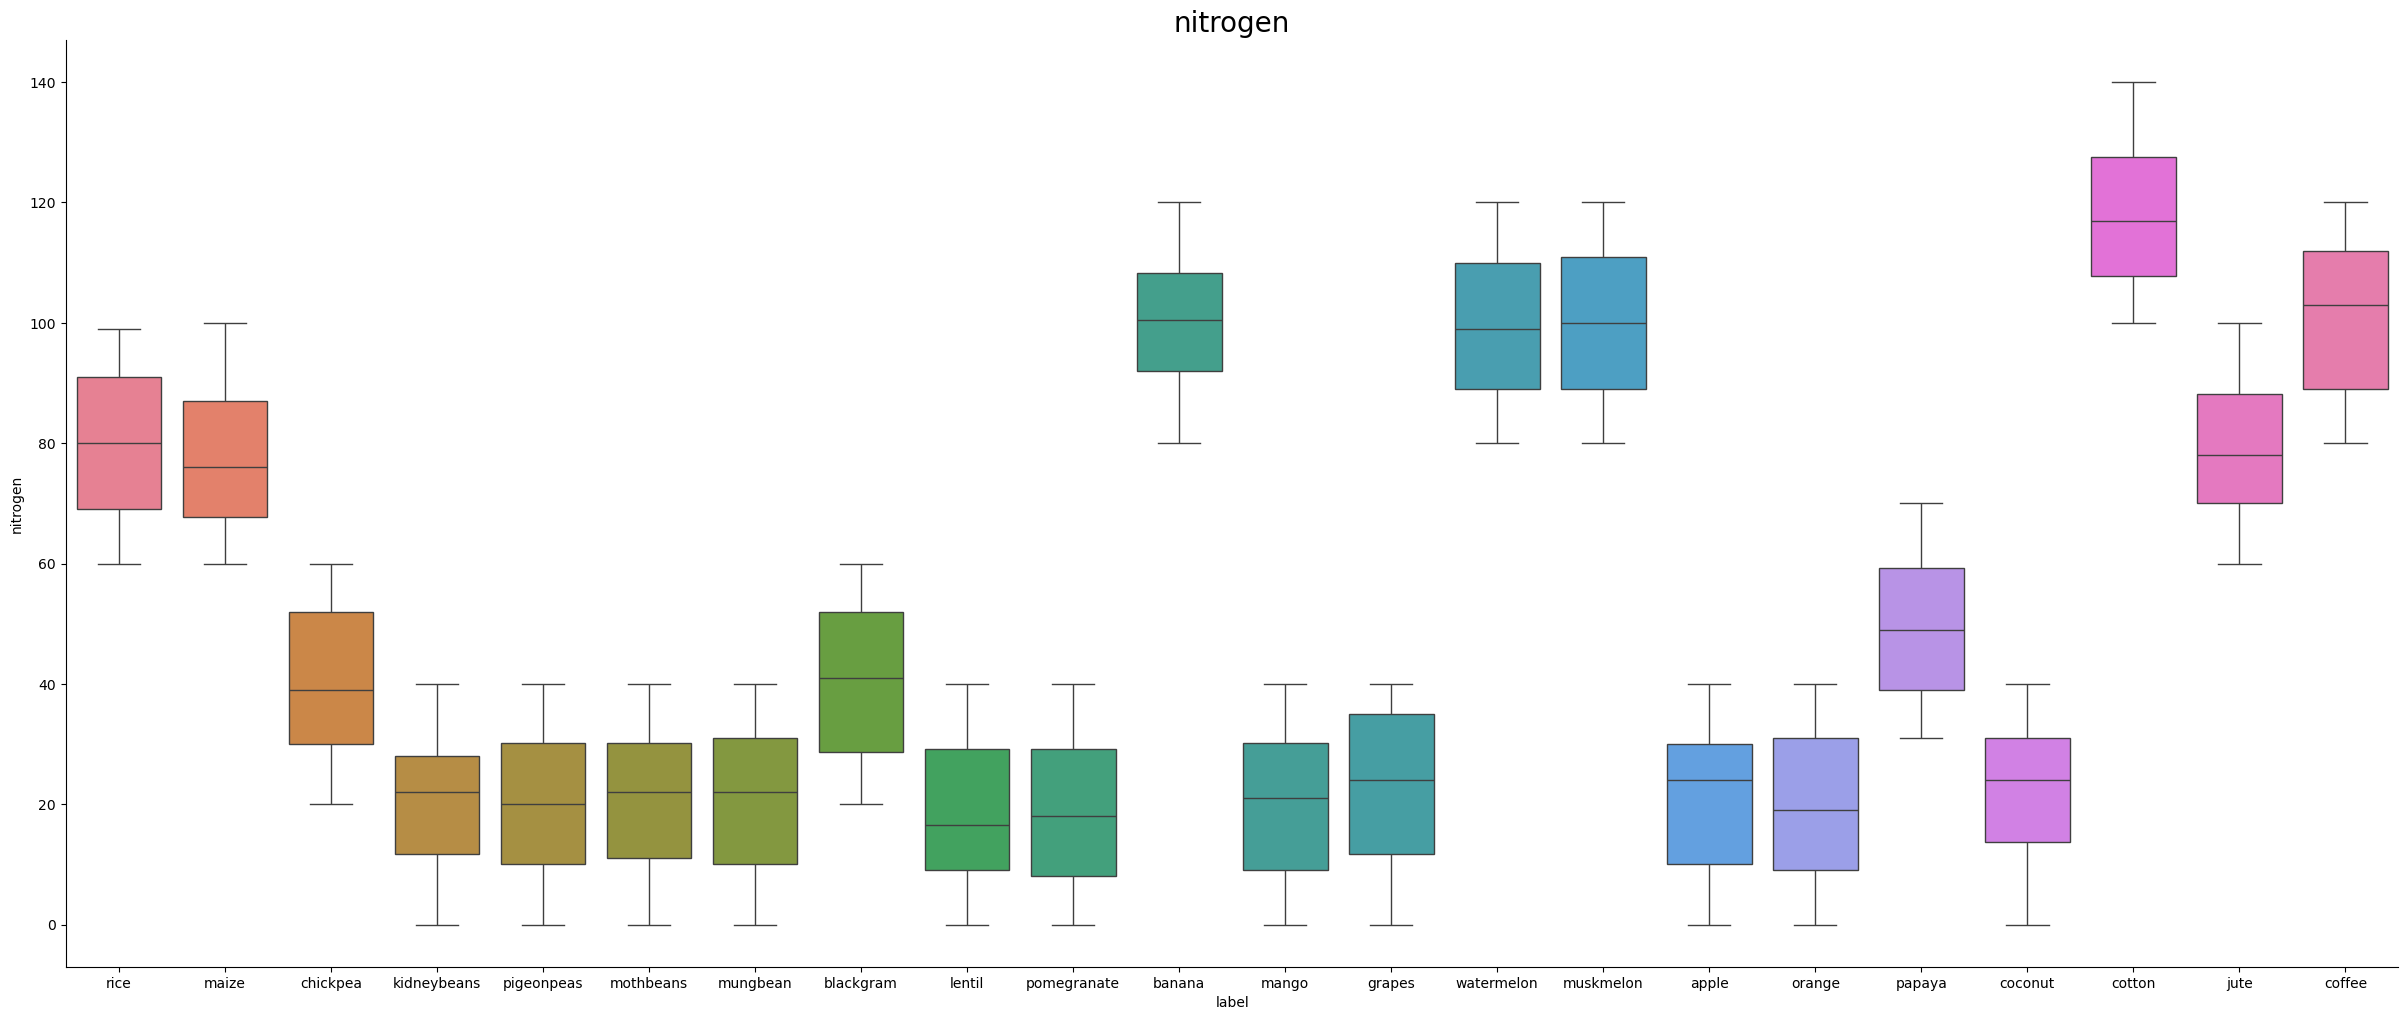

In [57]:
sns.catplot(data=df, x="label", y="nitrogen", kind="box",hue="label", height=10, aspect=20/8.27)
plt.title("nitrogen", size=20)
plt.show()

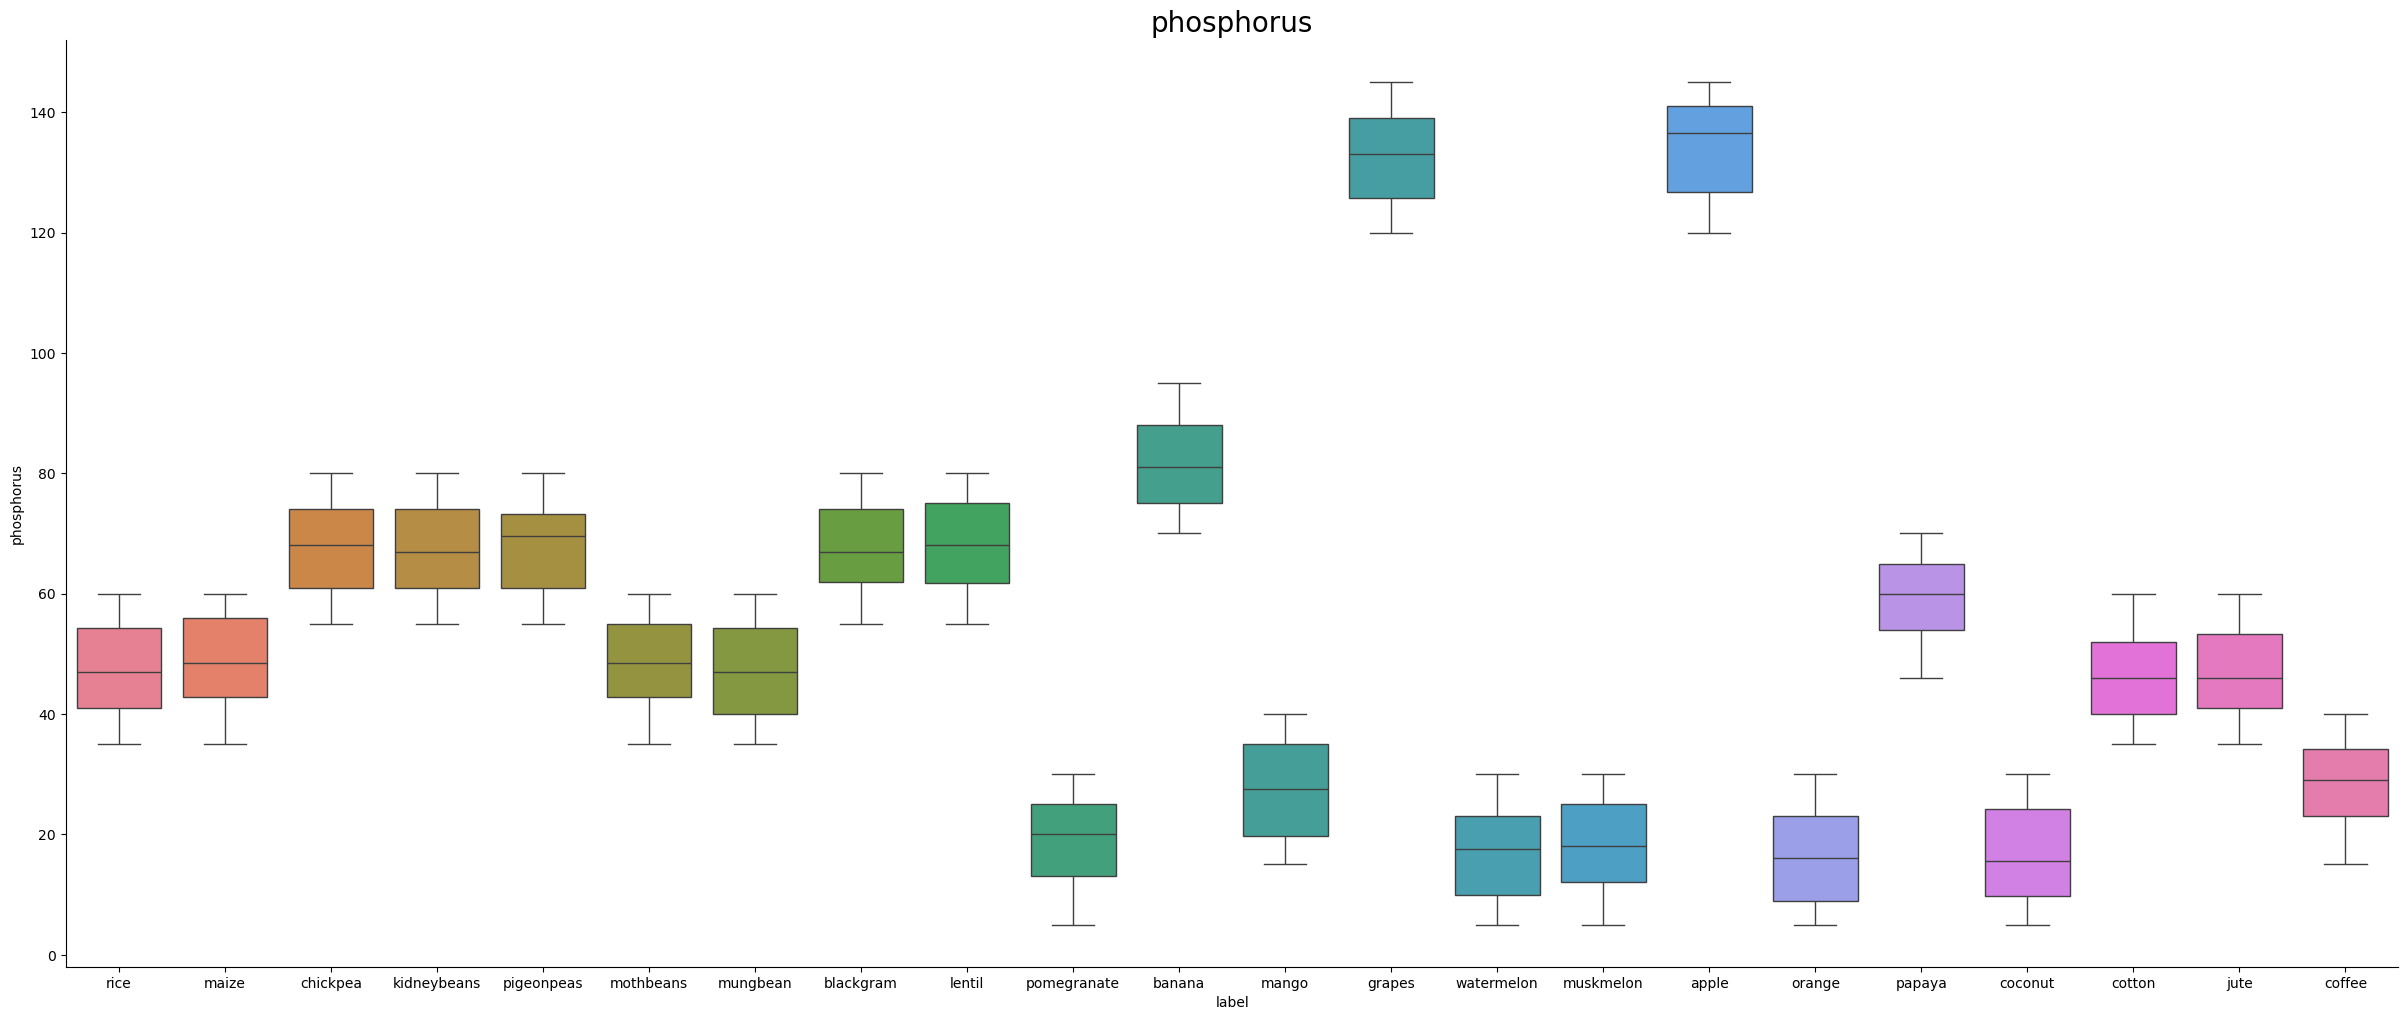

In [58]:
sns.catplot(data=df, x="label", y="phosphorus", kind="box",hue="label", height=10, aspect=20/8.27)
plt.title("phosphorus", size=20)
plt.show()

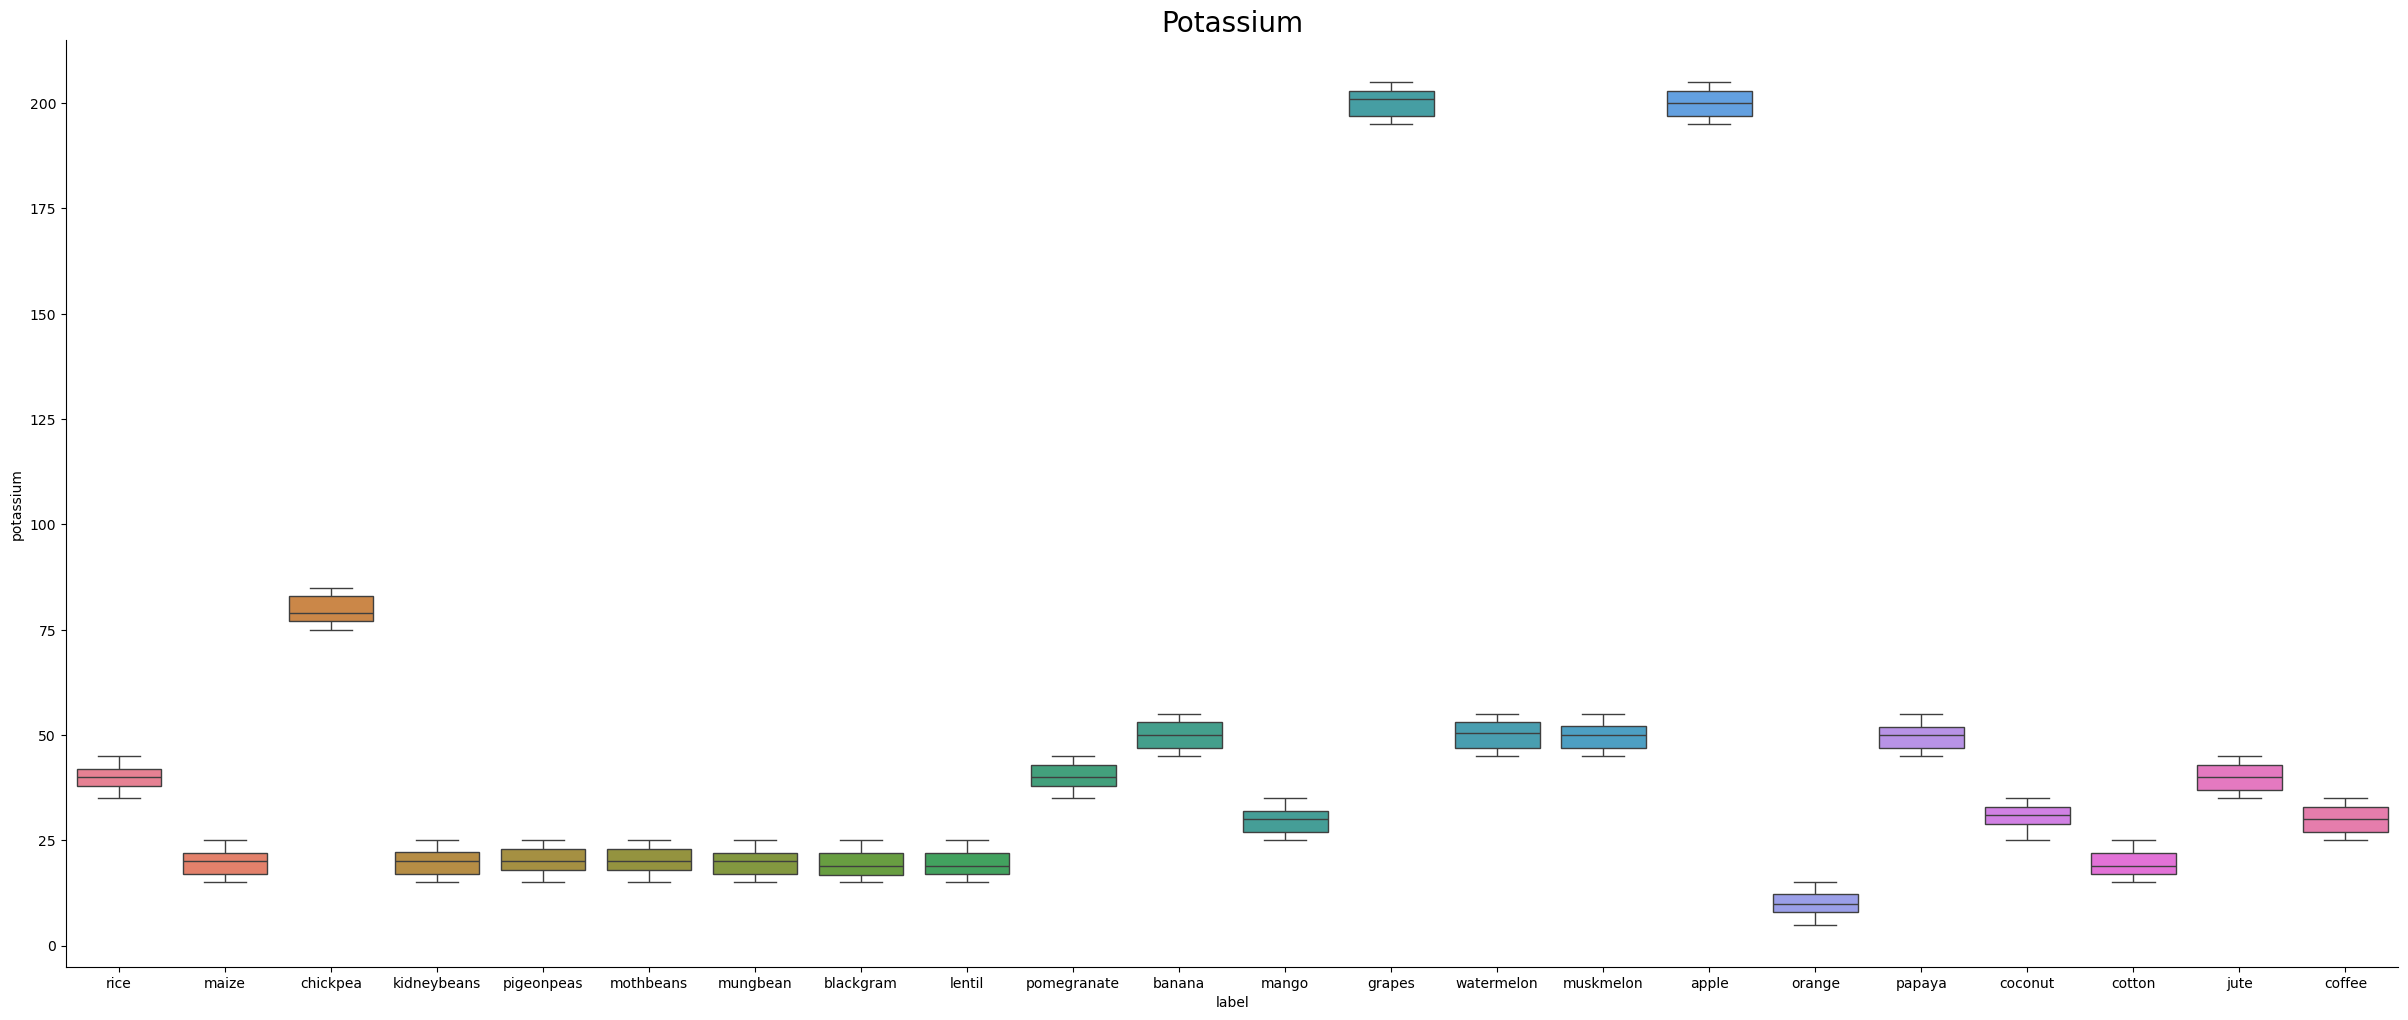

In [59]:
sns.catplot(data=df, x="label", y="potassium", kind="box",hue="label", height=10, aspect=20/8.27)
plt.title("Potassium", size=20)
plt.show()

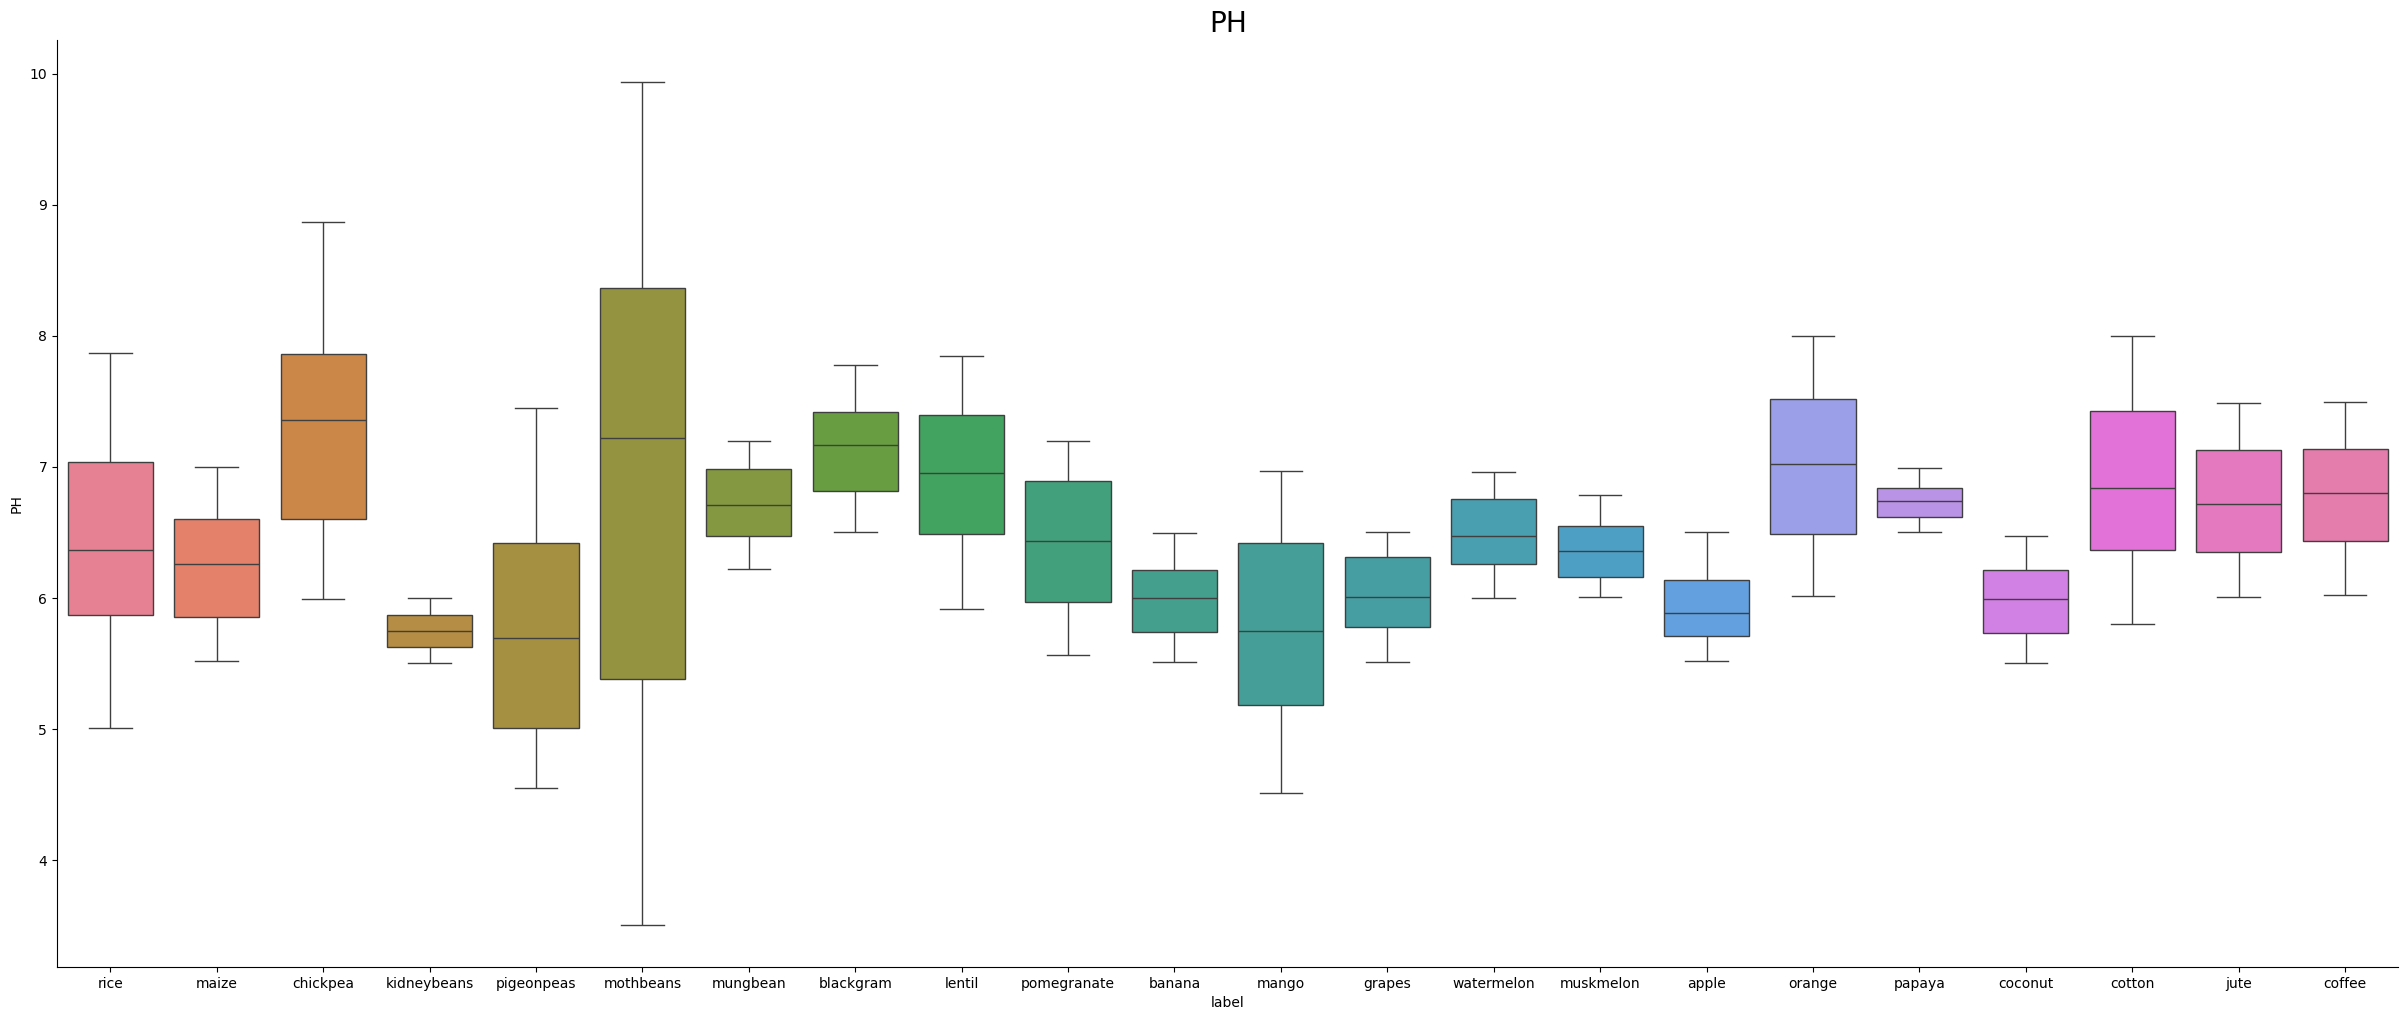

In [60]:
sns.catplot(data=df, x="label", y="PH", kind="box",hue="label", height=10, aspect=20/8.27)
plt.title("PH", size=20)
plt.show()

The above shows the absence of outliers in the data

In [62]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   Maximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df["potassium"][df["label"]=="rice"])

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   Maximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [63]:
for i in df["label"].unique():
    detect_outlier(df["potassium"][df["label"]==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   Maximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   Maximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   Maximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   Maximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   Maximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

# Machine learning process
- Split data  into input and target

In [64]:
X = df.drop(["label"], axis=1)
X.head()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [65]:
y = df["label"]
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [66]:
#  Convert the target variable into numeric values
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)
print("label length: ",len(y))

label length:  2200


In [67]:
# Split into training and testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1760 440 1760 440


Training the model using Dtree, SVM and random forest

In [69]:
a={"decision tree" : {
        "model" : DecisionTreeClassifier(criterion="gini"),
        "params":{"decisiontreeclassifier__splitter":["best","random"]}
    },
    "svm": {
        "model": SVC(gamma="auto",probability=True),
        "params" : {
            "svc__C": [1,10,100,1000],
            "svc__kernel": ["rbf","linear"]
        }  
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params" : {
            "randomforestclassifier__n_estimators": [1,5,10]
        }
    },
   "k classifier":{
       "model":KNeighborsClassifier(),
       "params":{"kneighborsclassifier__n_neighbors":[5,10,20,25],"kneighborsclassifier__weights":["uniform","distance"]}
   }
}

In [71]:
score=[]
details = []
best_param = {}
for mdl,par in a.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par["model"])
    res = model_selection.GridSearchCV(pipe,par["params"],cv=5)
    res.fit(X_train,y_train)
    score.append({
        "Model name":mdl,
        "Best score":res.best_score_,
        "Best param":res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.985795,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.988068,"{'svc__C': 100, 'svc__kernel': 'rbf'}"
2,random_forest,0.993182,{'randomforestclassifier__n_estimators': 10}
3,k classifier,0.980114,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [72]:
details[0]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043022,0.011748,0.006697,0.002191,best,{'decisiontreeclassifier__splitter': 'best'},0.985795,0.985795,0.977273,0.997159,0.982955,0.985795,0.006478,1
1,0.008342,0.000807,0.003321,0.001072,random,{'decisiontreeclassifier__splitter': 'random'},0.971591,0.957386,0.957386,0.980114,0.957386,0.964773,0.009439,2


In [73]:
details[1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.524785,0.085556,0.099534,0.048283,1,rbf,"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.980114,0.982955,0.982955,0.988636,0.985795,0.984091,0.002897,5
1,0.404462,0.181837,0.031096,0.014801,1,linear,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.977273,0.977273,0.988636,0.985795,0.994318,0.984659,0.006626,4
2,0.436607,0.037289,0.062320,0.022869,10,rbf,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.980114,0.982955,0.985795,0.994318,0.994318,0.987500,0.005850,2
3,0.279125,0.040955,0.021083,0.007555,10,linear,"{'svc__C': 10, 'svc__kernel': 'linear'}",0.974432,0.982955,0.988636,0.980114,0.991477,0.983523,0.006067,6
4,0.522243,0.066792,0.081624,0.017158,100,rbf,"{'svc__C': 100, 'svc__kernel': 'rbf'}",0.980114,0.985795,0.988636,0.991477,0.994318,0.988068,0.004888,1
5,0.272555,0.047739,0.017966,0.003375,100,linear,"{'svc__C': 100, 'svc__kernel': 'linear'}",0.977273,0.980114,0.988636,0.977273,0.988636,0.982386,0.005207,8
6,0.490799,0.110335,0.066628,0.020604,1000,rbf,"{'svc__C': 1000, 'svc__kernel': 'rbf'}",0.977273,0.982955,0.988636,0.994318,0.991477,0.986932,0.006120,3
7,0.291860,0.021350,0.018355,0.004434,1000,linear,"{'svc__C': 1000, 'svc__kernel': 'linear'}",0.977273,0.982955,0.988636,0.977273,0.988636,0.982955,0.005082,7


In [74]:
score

[{'Model name': 'decision tree',
  'Best score': 0.9857954545454547,
  'Best param': {'decisiontreeclassifier__splitter': 'best'}},
 {'Model name': 'svm',
  'Best score': 0.9880681818181818,
  'Best param': {'svc__C': 100, 'svc__kernel': 'rbf'}},
 {'Model name': 'random_forest',
  'Best score': 0.9931818181818182,
  'Best param': {'randomforestclassifier__n_estimators': 10}},
 {'Model name': 'k classifier',
  'Best score': 0.9801136363636364,
  'Best param': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'}}]

In [75]:
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.985795,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.988068,"{'svc__C': 100, 'svc__kernel': 'rbf'}"
2,random_forest,0.993182,{'randomforestclassifier__n_estimators': 10}
3,k classifier,0.980114,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [ ]:
for i in best_param.keys():
    print(f"{i} : {best_param[i].score(X_test,y_test)}")

decision tree : 0.9840909090909091
svm : 0.975
random_forest : 0.990909090909091
k classifier : 0.9681818181818181


In [81]:
predicted = best_param["random_forest"].predict(X_test)
predicted

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

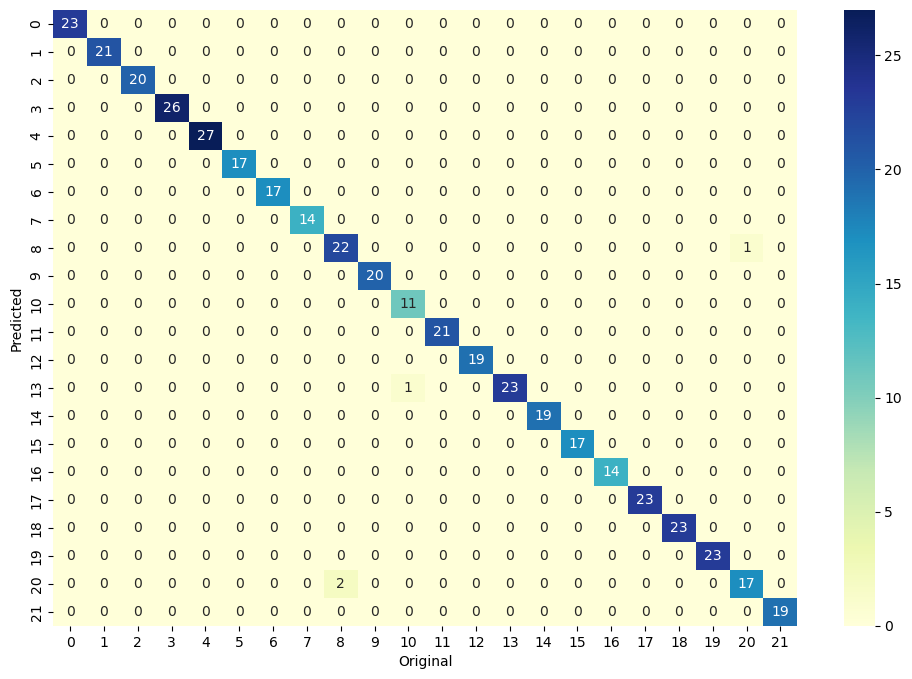

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,cmap="YlGnBu",fmt="d")
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

Using a bagging classifier to fine tune the weak learners

In [86]:
pipe1 = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=10))

bag_model = BaggingClassifier(estimator=pipe1, n_estimators=100,
                              oob_score=True, random_state=0, max_samples=0.8)

In [88]:
bag_model.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('randomforestclassifier',
                                             RandomForestClassifier(n_estimators=10))]),
                  max_samples=0.8, n_estimators=100, oob_score=True,
                  random_state=0)

In [90]:
predict = bag_model.predict(X_test)

In [94]:
best_model = bag_model
print(best_model.score(X_test,y_test))

0.9931818181818182


In [96]:
joblib.dump(best_model,"crop_recommendation.pkl")

['crop_recommendation.pkl']

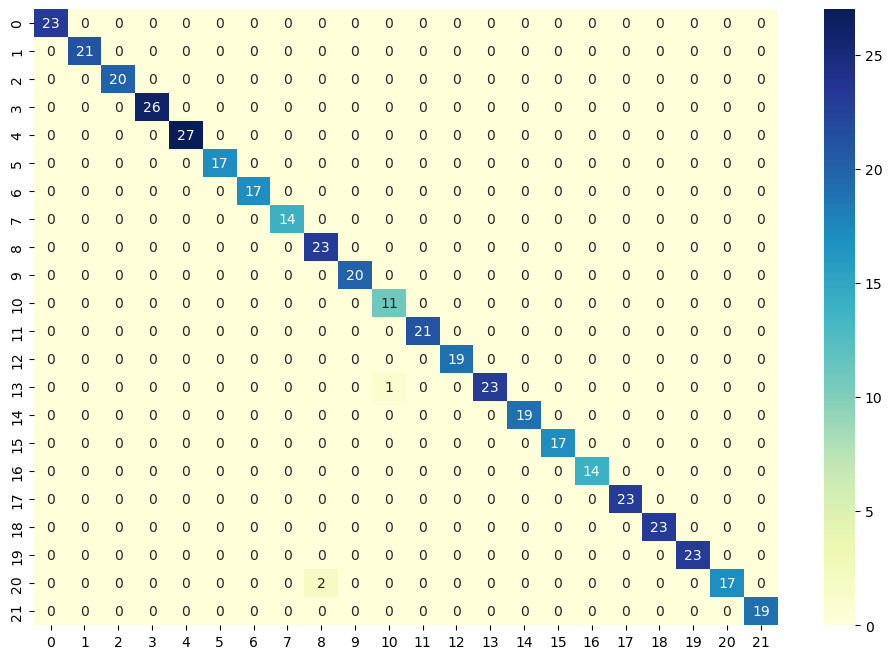

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cmap="YlGnBu",fmt="d")
plt.show()

In [92]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

The model predicts the crops accurately based on the existing soil conditions and helps to know which plant can grow well in certain set conditions.